# Logistic Regression

Objective: Predicting whether the person donated blood in March 2007  
Dataset: transfusion.data  
Ref: NA

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv("transfusion.data")
print('Dataset size', data.shape)
data.head()

Dataset size (748, 5)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [2]:
col_name = ['recency','frequency','ccblood','time','donate']
data.columns = col_name
data.head()

,recency,frequency,ccblood,time,donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Data Preparation and Exploration

2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
12      6
8       6
0       5
6       5
13      5
10      3
15      2
18      2
38      2
72      1
17      1
20      1
22      1
25      1
26      1
35      1
39      1
40      1
74      1
Name: recency, dtype: int64


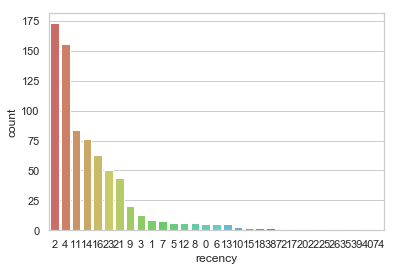

In [3]:
print(data['recency'].value_counts())

sns.countplot(x='recency',data = data, palette='hls',order = data['recency'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

0    570
1    178
Name: donate, dtype: int64


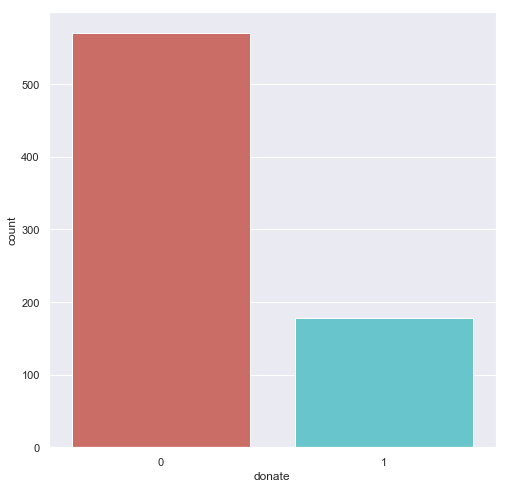

In [4]:
print(data['donate'].value_counts())

sns.countplot(x='donate',data = data, palette='hls',order = data['donate'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

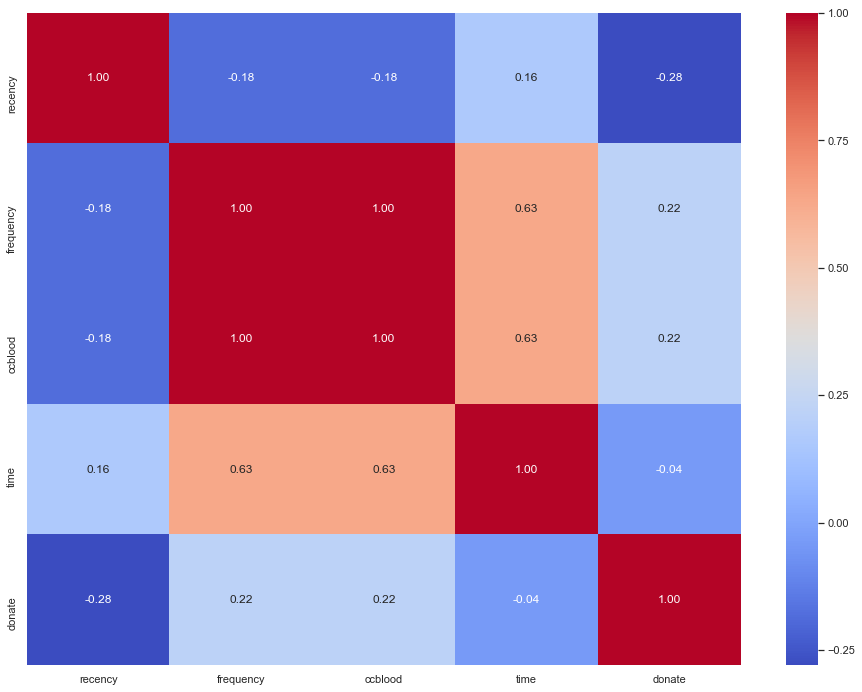

In [5]:
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.corr()
corr_rank["donate"].sort_values(ascending=False)

donate       1.000000
frequency    0.218633
ccblood      0.218633
time        -0.035854
recency     -0.279869
Name: donate, dtype: float64

## Data Processing and Selection

In [7]:
X = np.asarray(data[['recency','frequency','ccblood','time']])
print(X.shape)
X[0:5]

(748, 4)


array([[    2,    50, 12500,    98],
       [    0,    13,  3250,    28],
       [    1,    16,  4000,    35],
       [    2,    20,  5000,    45],
       [    1,    24,  6000,    77]], dtype=int64)

In [8]:
y = np.asarray(data['donate'])
print(y.shape)
y[0:5]

(748,)


array([1, 1, 1, 1, 0], dtype=int64)

In [9]:
#normalize data
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.92789873,  7.62334626,  7.62334626,  2.61563344],
       [-1.17511806,  1.28273826,  1.28273826, -0.2578809 ],
       [-1.0515084 ,  1.79684161,  1.79684161,  0.02947053],
       [-0.92789873,  2.48231275,  2.48231275,  0.43997258],
       [-1.0515084 ,  3.16778388,  3.16778388,  1.75357914]])

## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4)
print('TRAIN set:', X_train.shape,y_train.shape)
print('TEST set :', X_test.shape, y_test.shape)

TRAIN set: (523, 4) (523,)
TEST set : (225, 4) (225,)


## Modelling

In [11]:
#using liblinear solver
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

ypred = logreg.predict(X_test)
print(ypred.shape)
ypred

(225,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [12]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

## Evaluation

In [13]:
#accuracy evaluation using jaccard index
#if match - accuracy us 1.0 otherwise 0
from sklearn.metrics import jaccard_similarity_score
print('Jaccard Accuracy Score: ', round(jaccard_similarity_score(y_test, ypred)*100,4))
print('Default Accuracy Score: ', round(logreg.score(X_train,y_train)*100,4))

Jaccard Accuracy Score:  76.0
Default Accuracy Score:  78.3939
